In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

/home/swagnercarena/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/swagnercarena/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/swagnercarena/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/swagnercarena/.local/lib/python3.5/site-packages/tensorflow/pyth

# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [3]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples)

100%|██████████| 1000/1000 [01:01<00:00, 16.36it/s]


In [4]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.012779100882779244 0.02718209923340982
external_shear_g2 0.01722637247447218 0.035291747039585375
lens_mass_center_x 0.007750155189520137 0.03455381366291538
lens_mass_center_y 0.010249480627899514 0.033764792523430134
lens_mass_e1 0.022819390355593404 0.04862944350835141
lens_mass_e2 0.02999729379069424 0.061250621275463324
lens_mass_gamma 0.038360114845859106 0.07969605448256237
lens_mass_theta_E_log 0.00903457873350711 0.033415588558287274


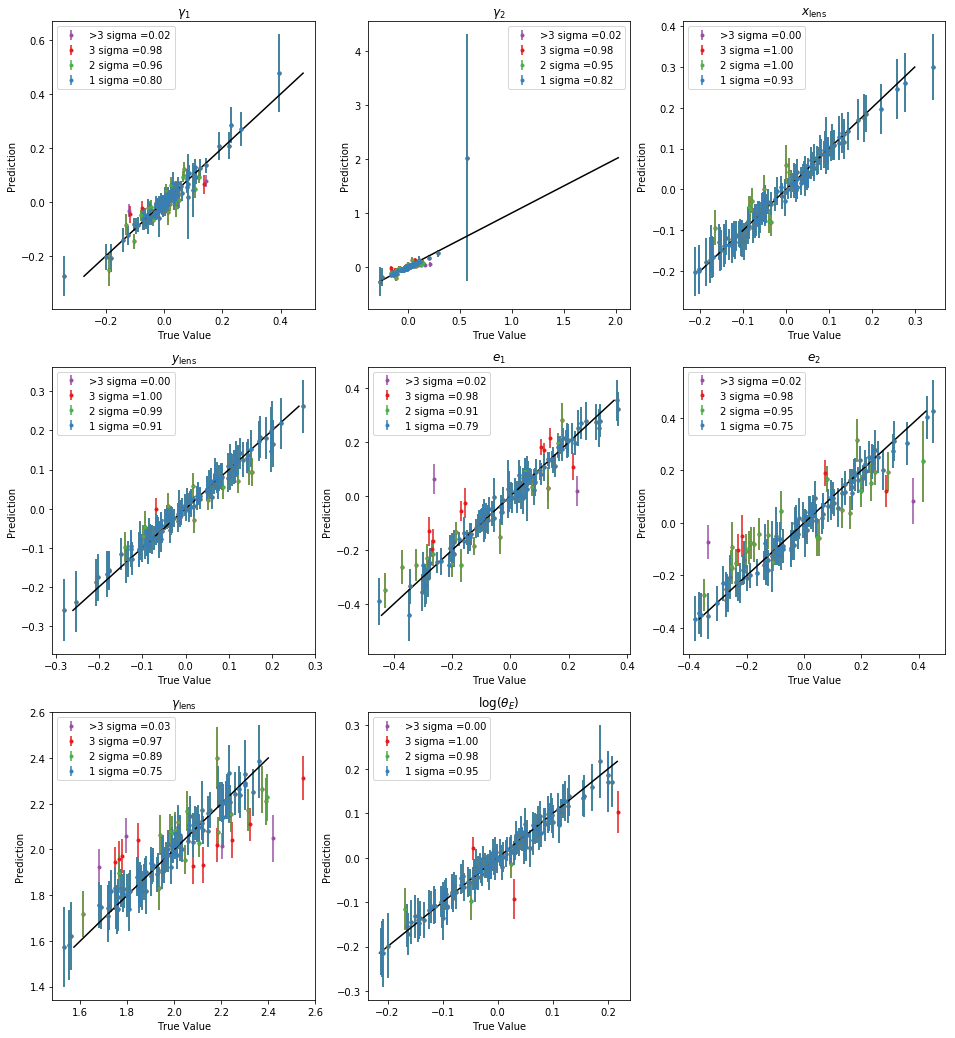

In [5]:
bnn_infer.gen_coverage_plots()

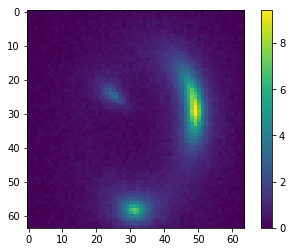

external_shear_g1 -0.18372874
external_shear_g2 0.08746242
lens_mass_center_x -0.048252854
lens_mass_center_y -0.10429029
lens_mass_e1 0.006869684
lens_mass_e2 0.4307631
lens_mass_gamma 1.8491002
lens_mass_theta_E_log -0.04160023


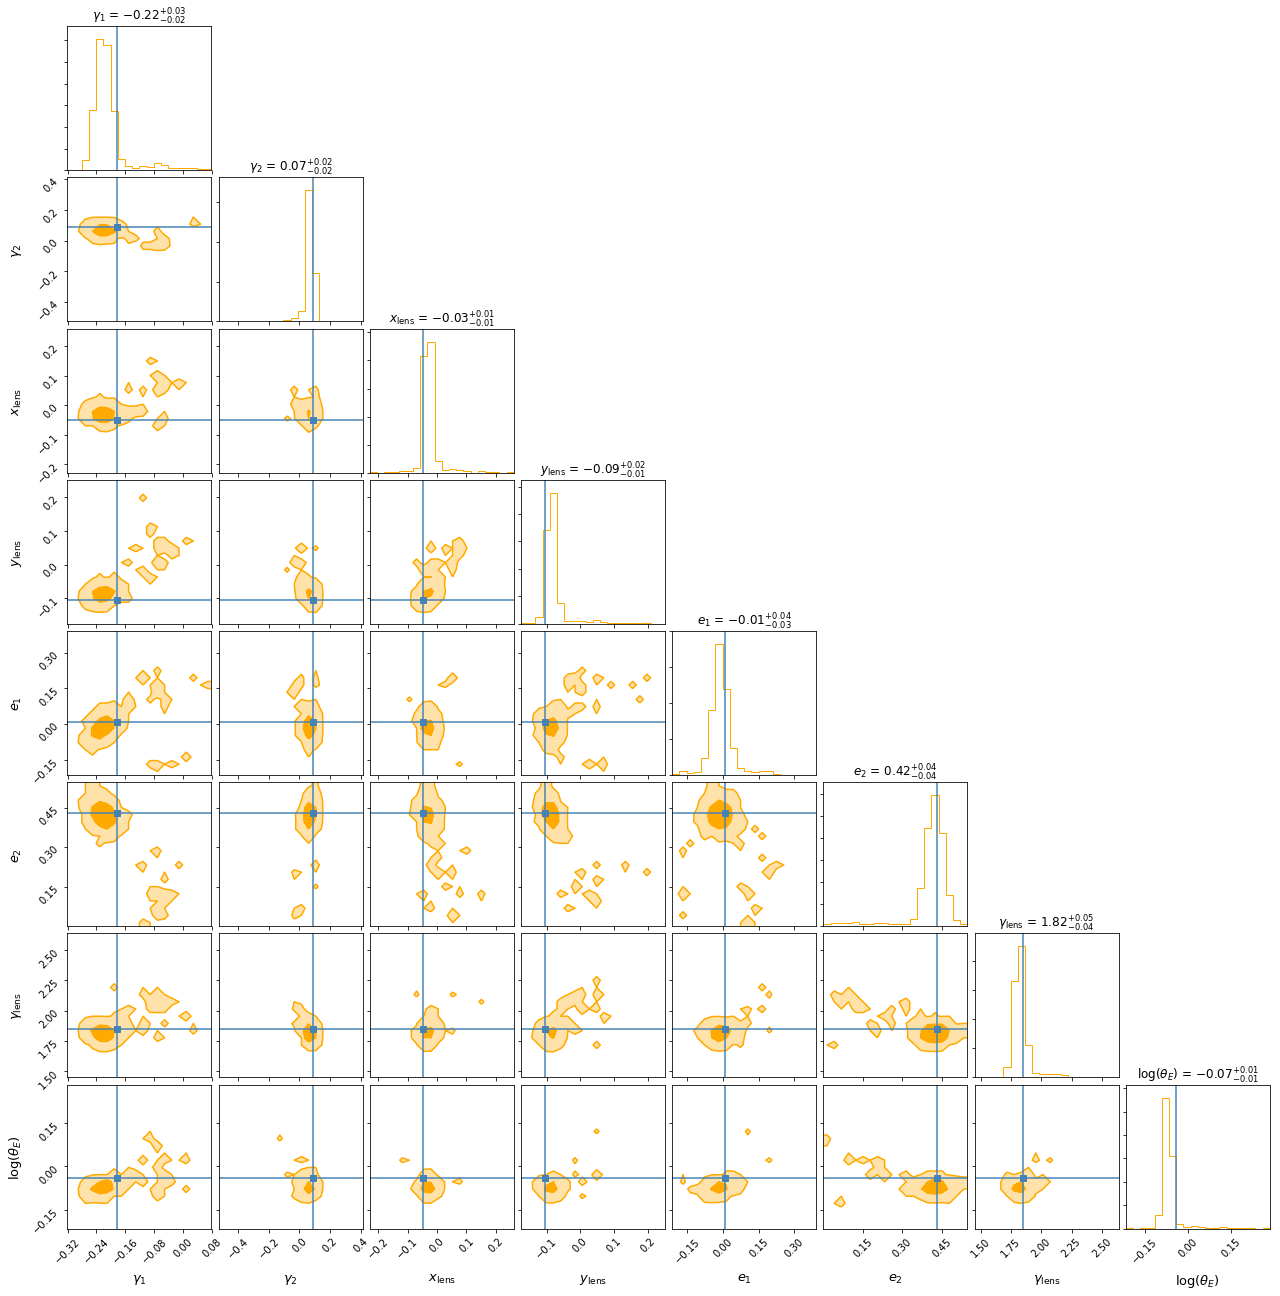

In [6]:
image_index = 10
bnn_infer.plot_posterior_contours(image_index)

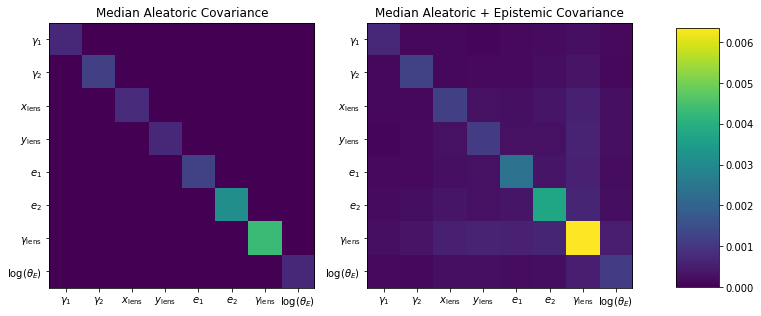

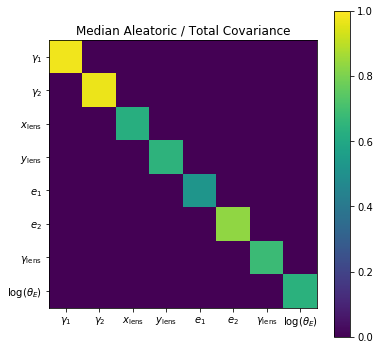

In [7]:
bnn_infer.comp_al_ep_unc()

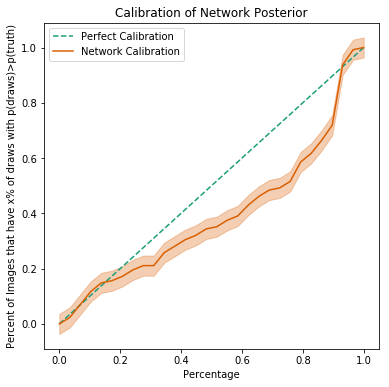

In [25]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

100%|██████████| 1000/1000 [01:11<00:00, 13.92it/s]


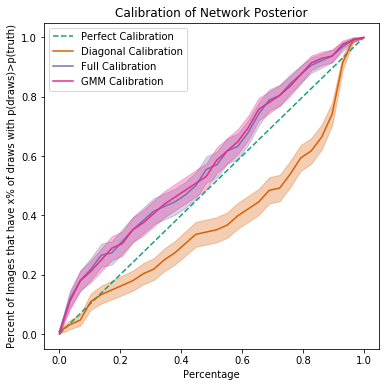

In [2]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples)

color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t2.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
bnn_infer.gen_samples(num_samples)

fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t2.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
bnn_infer.gen_samples(num_samples)

fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration','Diagonal Calibration','Full Calibration',
                                       'GMM Calibration'])

## Diagonal Posterior - Shifting Image

In [14]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1_shift.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 100
bnn_infer.gen_samples(num_samples)

100%|██████████| 100/100 [00:06<00:00, 15.76it/s]


In [15]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.04466747170946503 0.02836550441003611
external_shear_g2 0.03227238234014592 0.06045991442035319
lens_mass_center_x 0.010513941533435416 0.03748223838456566
lens_mass_center_y 0.009336573593380169 0.03798894237215488
lens_mass_e1 0.025568812236462013 0.03994948901214891
lens_mass_e2 0.034007890581778735 0.04661804083744704
lens_mass_gamma 0.04532025233750325 0.07075128959847907
lens_mass_theta_E_log 0.010642605700792543 0.025306813784597294


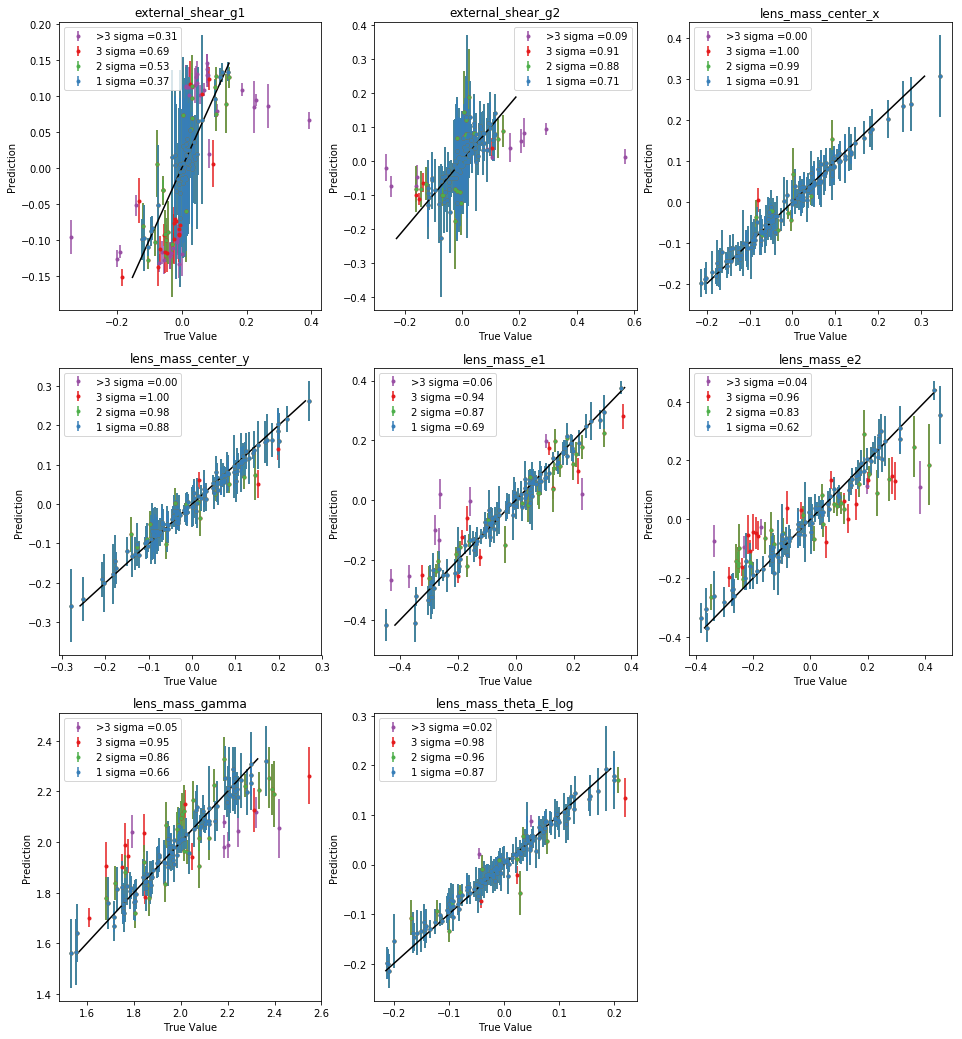

In [16]:
bnn_infer.gen_coverage_plots()

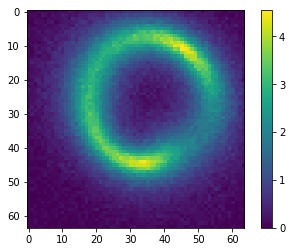

external_shear_g1 -0.048773624
external_shear_g2 -0.013596282
lens_mass_center_x 0.13594937
lens_mass_center_y -0.1384266
lens_mass_e1 -0.106109984
lens_mass_e2 0.042750333
lens_mass_gamma 2.0251117
lens_mass_theta_E_log -0.07558193


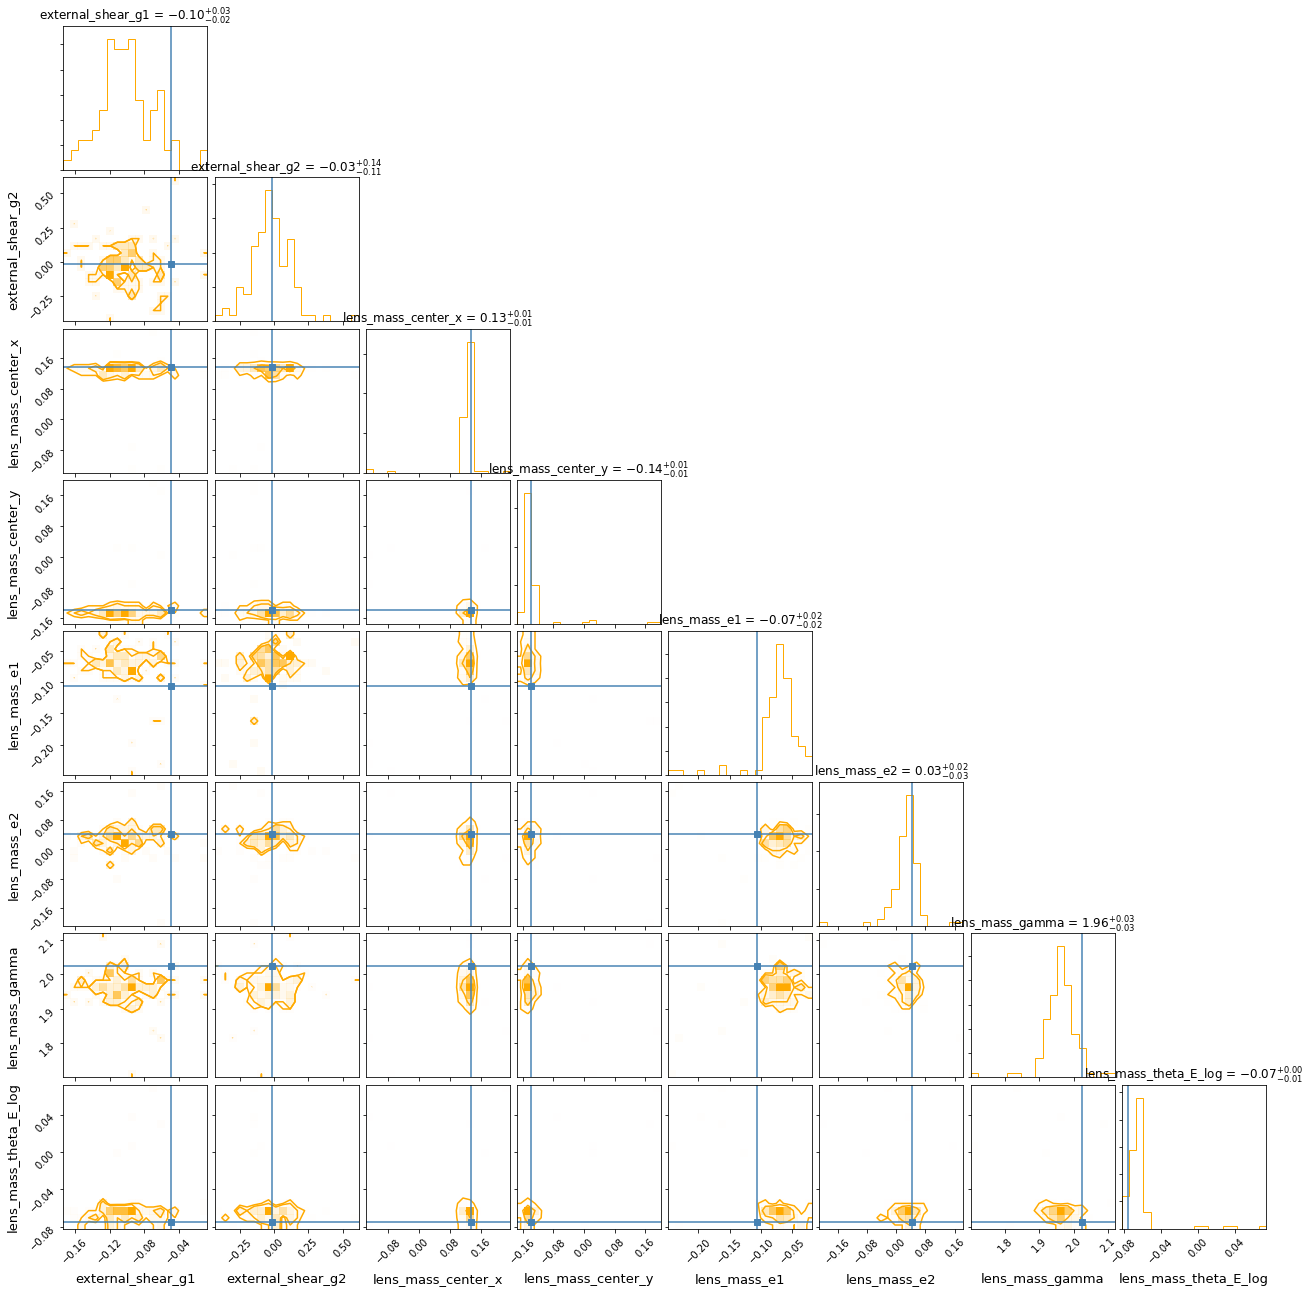

In [17]:
image_index = 10
bnn_infer.plot_posterior_contours(image_index)

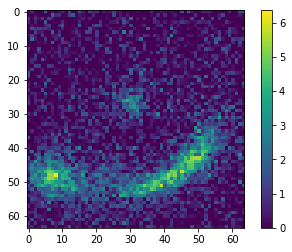

external_shear_e1 0.46957305
external_shear_e2 -0.3272191
lens_mass_center_x -0.049306132
lens_mass_center_y 0.14651802
lens_mass_e1 -0.14563811
lens_mass_e2 -0.09435817
lens_mass_gamma 1.9729527
lens_mass_theta_E_log -0.15823641


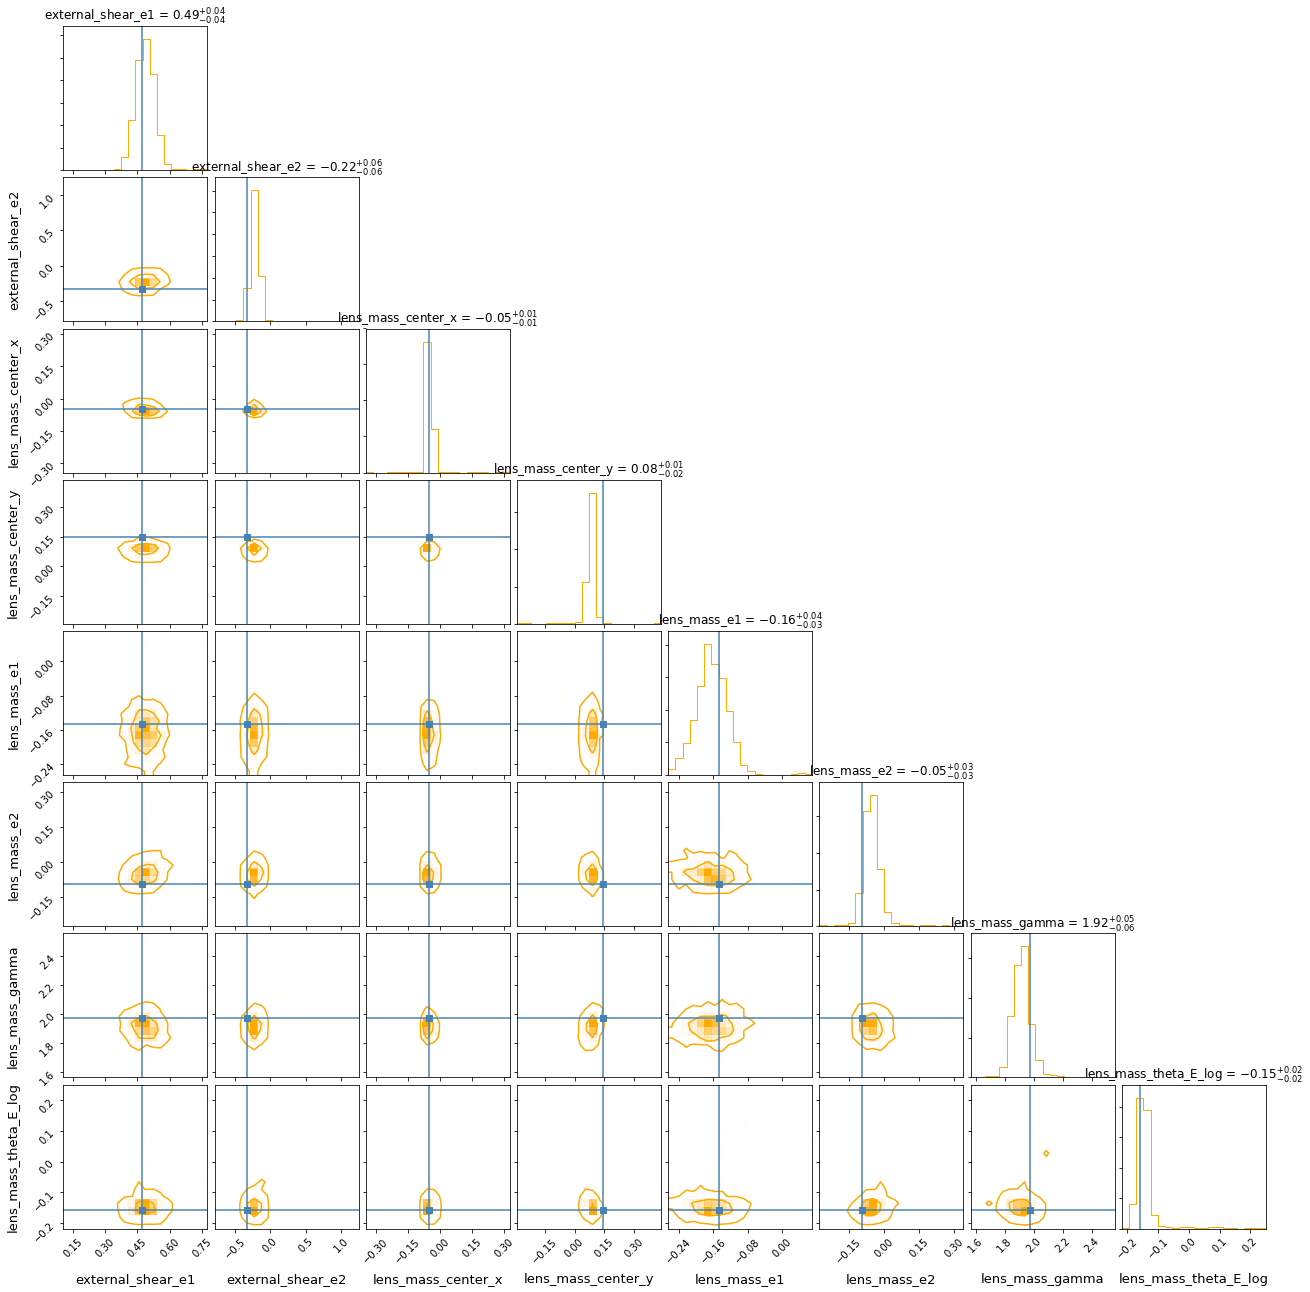

In [19]:
image_index = 5
bnn_infer.plot_posterior_contours(image_index)

## Diagonal Posterior - Shifting Image + Large Regularizer

In [20]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1_hr.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples)

100%|██████████| 1000/1000 [00:57<00:00, 17.33it/s]


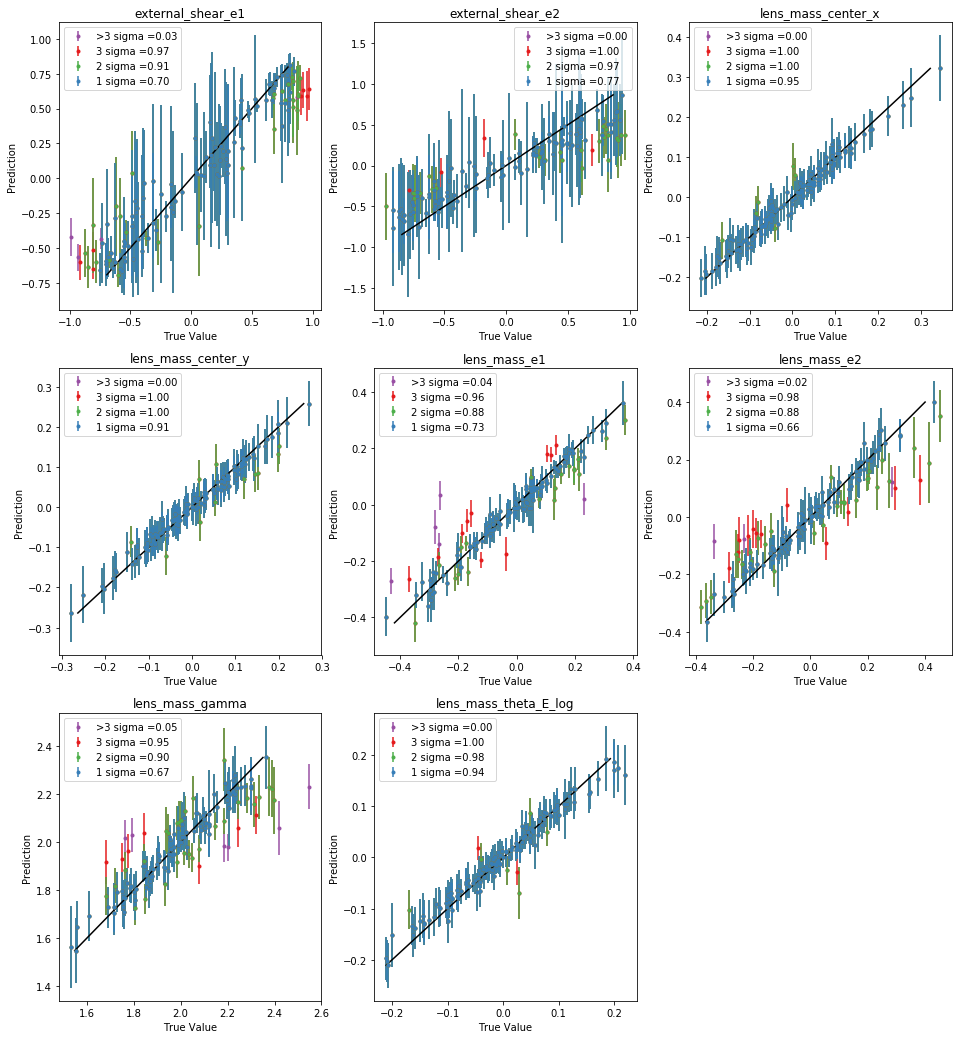

In [21]:
bnn_infer.gen_coverage_plots()

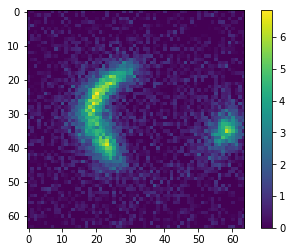

external_shear_e1 0.83806634
external_shear_e2 0.44987476
lens_mass_center_x 0.044151004
lens_mass_center_y -0.03254472
lens_mass_e1 -0.34788495
lens_mass_e2 -0.12993078
lens_mass_gamma 2.0050497
lens_mass_theta_E_log -0.07891502


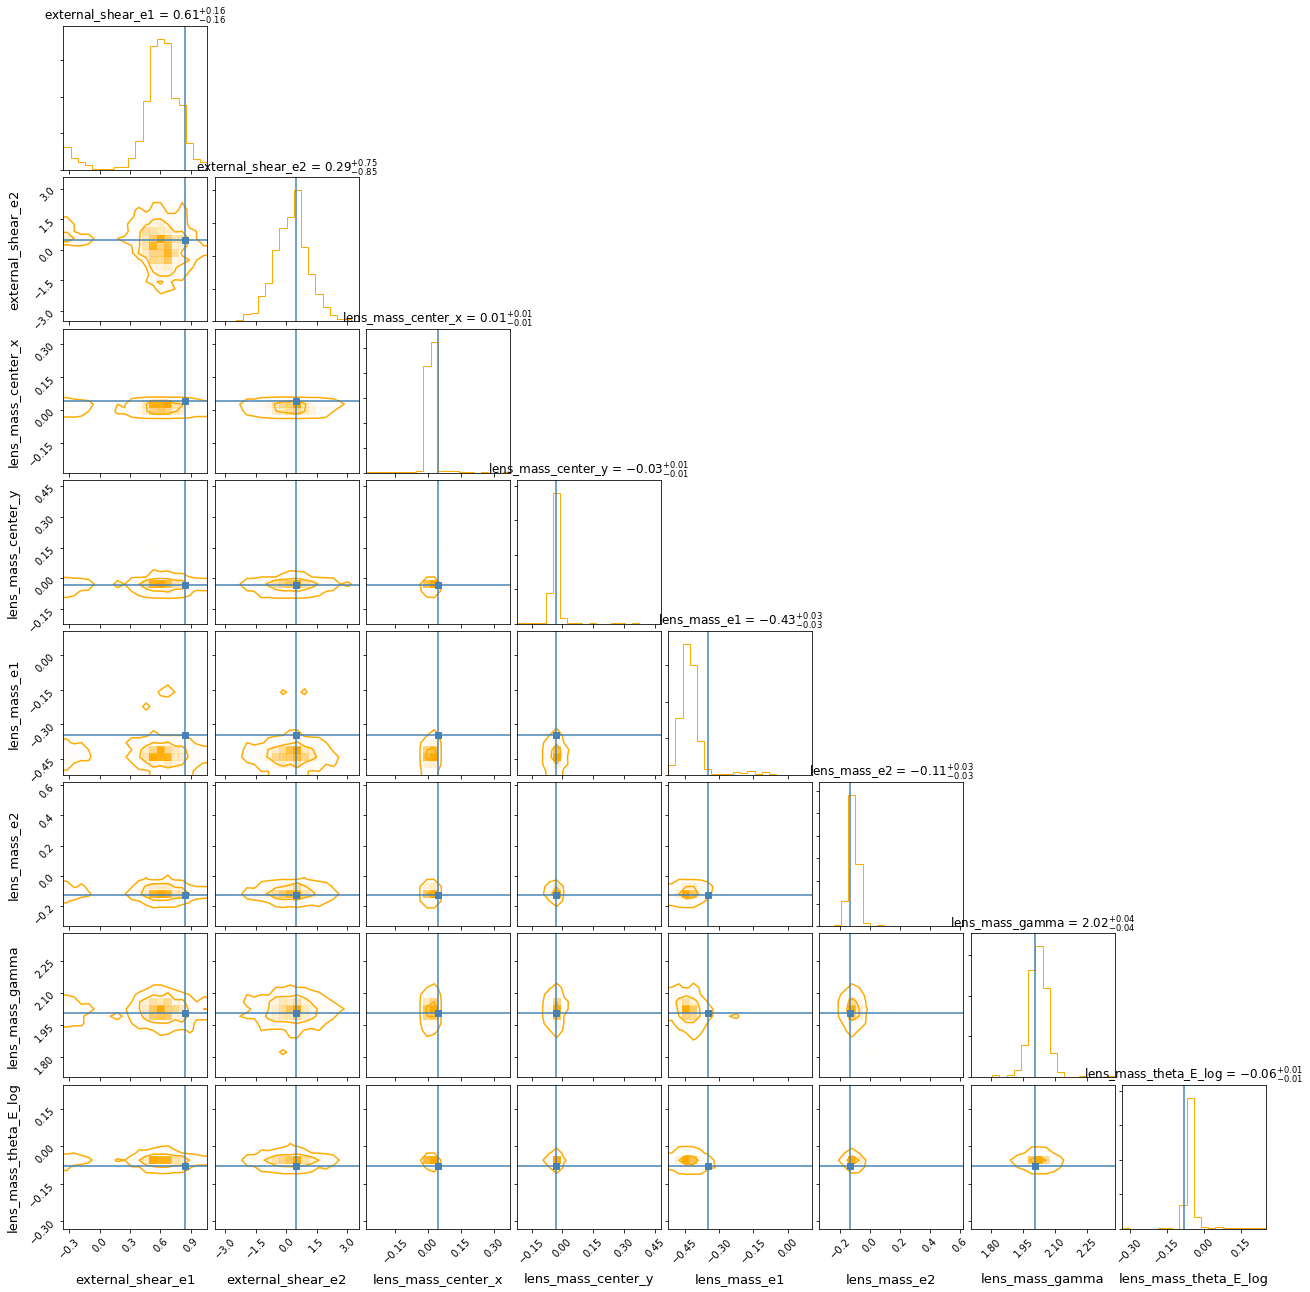

In [22]:
image_index = 10
bnn_infer.plot_posterior_contours(image_index)

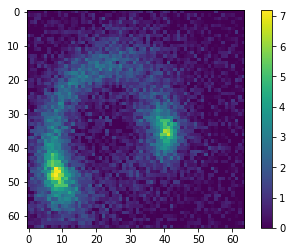

external_shear_e1 0.81051385
external_shear_e2 0.5158096
lens_mass_center_x -0.09432464
lens_mass_center_y 0.16909118
lens_mass_e1 0.100333296
lens_mass_e2 0.18822311
lens_mass_gamma 1.9625404
lens_mass_theta_E_log -0.08080719


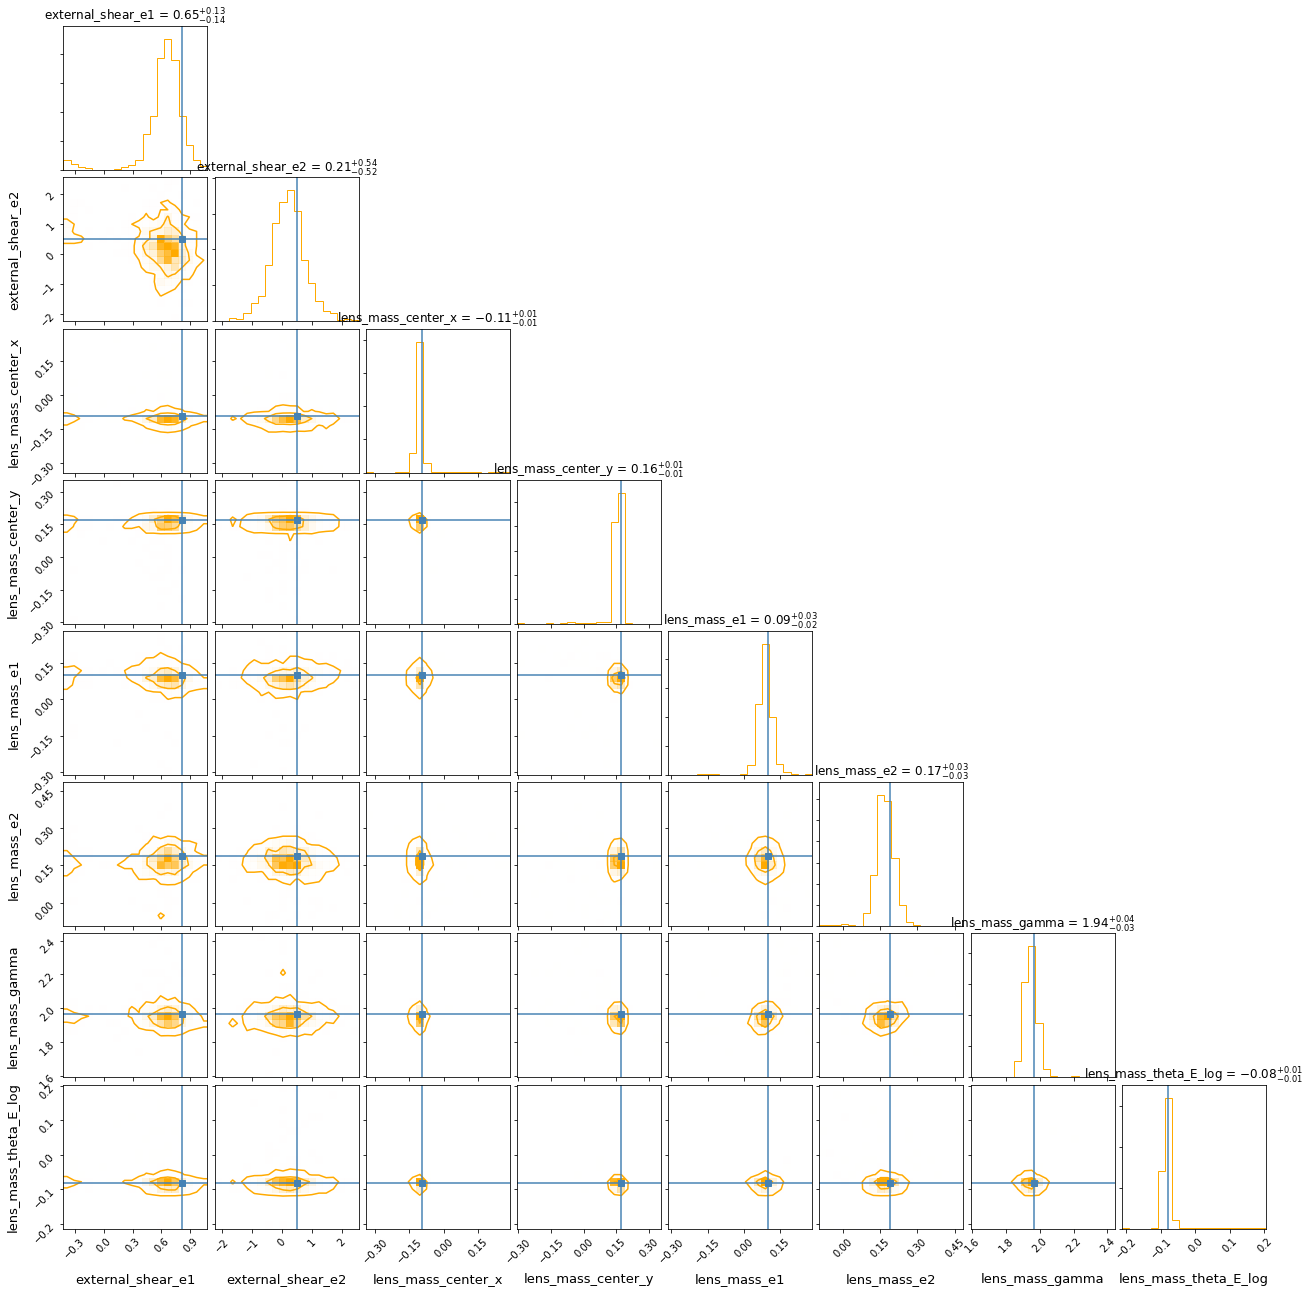

In [23]:
image_index = 5
bnn_infer.plot_posterior_contours(image_index)